In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
plt.style.use("seaborn-v0_8-white")

data=pd.read_csv("../contents/perrin-freres-monthly-champagne.csv")

data.head()


,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [79]:
data["Month"][106]
data.loc[106]
data.dropna(inplace=True)
data["Month"]=pd.to_datetime(data["Month"])
data=data.set_index(data["Month"])
data.drop("Month", axis=1, inplace=True)
data

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [80]:
from statsmodels.tsa.stattools import adfuller

def adf_test(x):
    stat, p_value, _, _, _, _ = adfuller(x)
    print("p_value:", p_value)
    if p_value <= 0.005:
        print("유의 수준 0.05 이하로 판단하여 이 데이터는 정상성입니다.")
    else:
        print("유의 수준 0.05 초과로 판단하여 이 데이터는 정상성이 아닙니다.")
    return p_value


adf_test(data)

p_value: 0.3639157716602467
유의 수준 0.05 초과로 판단하여 이 데이터는 정상성이 아닙니다.


0.3639157716602467

<Axes: xlabel='Month'>

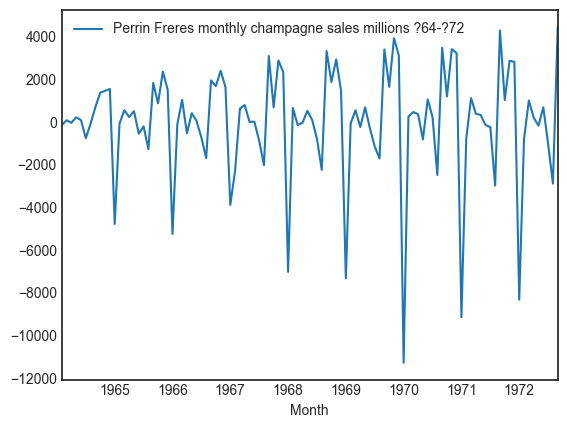

In [81]:
diff_data = data.copy()
diff_data = diff_data.diff()
diff_data.dropna(inplace=True)
diff_data.plot()

p_value: 2.51962044738698e-10
유의 수준 0.05 이하로 판단하여 이 데이터는 정상성입니다.


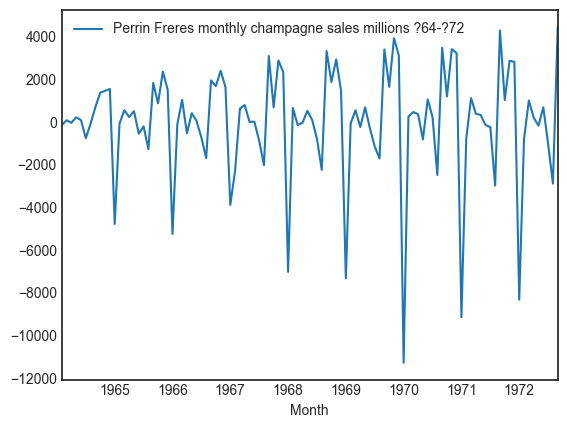

In [82]:
adf_test(diff_data)
diff_data.plot()
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima


from sklearn.model_selection import train_test_split
train, test=train_test_split(data, test_size=0.2, shuffle=False)
auto_model=auto_arima(train, m=4, seasonal=True)
print(auto_model.aic())

1436.8511677436966


In [84]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   84
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 4)   Log Likelihood                -708.426
Date:                           Thu, 07 Dec 2023   AIC                           1436.851
Time:                                   14:40:03   BIC                           1461.040
Sample:                               01-01-1964   HQIC                          1446.569
                                    - 12-01-1970                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     52.5774     52.831      0.995      0.320     -50.969     156.124
ar.L1          0.8029      0.601      1.335      0.182      -0.376       1.981
ar.L2         -0.3281      0.240     -1.366      0.172      -0.799       0.143
ma.L1         -1.4644      0.573     -2.558      0.011      -2.587      -0.342
ma.L2          0.4745      0.609      0.779      0.436      -0.719       1.668
ar.S.L4       -1.0438      0.048    -21.560      0.000      -1.139      -0.949
ar.S.L8       -0.9755      0.027    -35.859      0.000      -1.029      -0.922
ma.S.L4        1.3309      0.192      6.944      0.000       0.955       1.706
ma.S.L8        0.8948      0.218      4.111      0.000       0.468       1.321
sigma2      1.086e+06   2.64e+05      4.112      0.000    5.68e+05     1.6e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 7.01
Prob(Q):                              0.76   Prob(JB):                         0.03
Heteroskedasticity (H):               1.80   Skew:                            -0.26
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
from sklearn.metrics import r2_score, mean_absolute_error

prediction=auto_model.predict(len(test))
print(r2_score(test, prediction))
print(mean_absolute_error(test, prediction))

0.7856810985416445
908.2525383727605


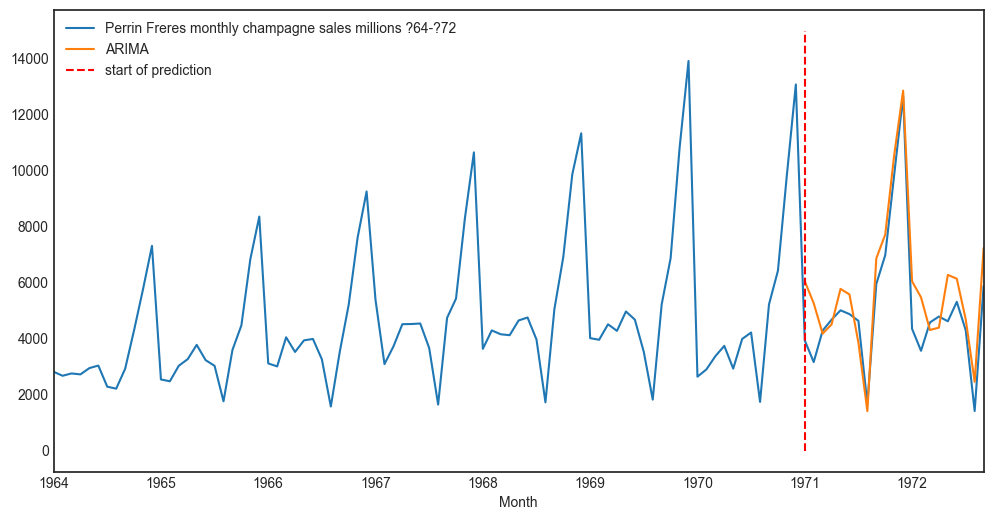

In [86]:
prediction_df=pd.DataFrame(prediction, index=test.index, columns=["ARIMA"])
fig, ax=plt.subplots(figsize=(12,6))
data.plot(ax=ax)
prediction_df.plot(ax=ax)
ax.vlines(test.index[0], 0, 15000,linestyle="--", color="r", label="start of prediction")
ax.legend()
plt.show()